In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class BsmModel:
    def __init__(self, option_type, price, strike, interest_rate, expiry, volatility, dividend_yield=0):
        self.s = price # Underlying asset price
        self.k = strike # Option strike K
        self.r = interest_rate # Continuous risk fee rate
        self.q = dividend_yield # Dividend continuous rate
        self.T = expiry # time to expiry (year)
        self.sigma = volatility # Underlying volatility
        self.type = option_type # option type "p" put option "c" call option
    def n(self, d):
        # cumulative probability distribution function of standard normal distribution
        return sp.norm.cdf(d)

    def dn(self, d):
        # the first order derivative of n(d)
        return sp.norm.pdf(d)

    def d1(self):
        d1 = (np.log(self.s / self.k) + (self.r - self.q + self.sigma ** 2 * 0.5) * self.T) / (self.sigma * np.sqrt(self.T))
        return d1

    def d2(self):
        d2 = (np.log(self.s / self.k) + (self.r - self.q - self.sigma ** 2 * 0.5) * self.T) / (self.sigma * np.sqrt(self.T))
        return d2

    def bsm_price(self):
        d1 = self.d1()
        d2 = d1 - self.sigma * np.sqrt(self.T)
        if self.type == 'c':
            price = np.exp(-self.r*self.T) * (self.s * np.exp((self.r - self.q)*self.T) * self.n(d1) - self.k * self.n(d2))
            return price
        elif self.type == 'p':
            price = np.exp(-self.r*self.T) * (self.k * self.n(-d2) - (self.s * np.
                                                                      exp((self.r - self.q)*self.T) * self.n(-d1)))
            return price
        else:
            print("option type can only be c or p")

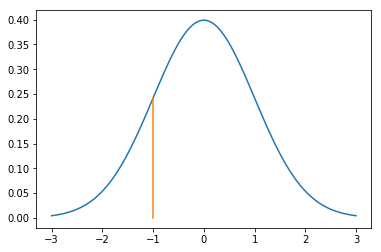

In [3]:

mu = 0
variance = 1
x = np.linspace(mu-3*variance,mu+3*variance, 100)
y = [sp.norm.pdf(i) for i in x]
plt.plot(x,y)
d = [-1]
plt.plot(d*100,np.linspace(0,sp.norm.pdf(d), 100))

### 
a = BsmModel('c', 42, 35, 0.1, 90.0/365, 0.2)
a.bsm_price()

In [4]:
# For a call option which expires in 90 days and no dividends paid, the underlying price is $42, 
#the strike is $35, the risk-free rate is 0.1, the volatility is 0.2.
# The price of this option is $6.157.
a = BsmModel('c', 846, 800, 0.01, 33/365, .73)
a.bsm_price()

97.63788194008579